<a href="https://colab.research.google.com/github/ondreiya/capstone/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/ST1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ST1


In [ ]:
!ls

In [ ]:
# Suppressing the warning messages
import warnings
warnings.filterwarnings('ignore')

This project is based on the Car Price Prediction Challenge data available from Kaggle repository (https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge?resource=download)


*   It contains the details of 19,237 car prices.
*   My project task is to create a machine learning model which can predict the average price of a car based on its characteristics.
*   To solve this, I will approach the task, with a step-by-step approach to create a data anlysis and prediction model based on (machine learning/AI algorithms, regression algorithm for example) available from different Python packages, modules and classes.


**Step 1: Reading the Data with Python**


One of the most important steps in data analysis.

In [54]:
# Reading the dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
car_price = pd.read_csv("/content/drive/MyDrive/ST1/car_price_prediction.csv", encoding="latin")
print("Shape before deleting duplicate values: ", car_price.shape)
# Removing duplicate rows if any
car_price=car_price.drop_duplicates()
print("Shape after deleting duplicate values: ", car_price.shape)
car_price['Mileage'] = car_price['Mileage'].str.replace(' km', '').astype(float)
car_price['Engine volume'] = car_price['Engine volume'].str.replace(' Turbo', '').astype(float)
car_price['Levy'] = car_price['Levy'].replace('-', np.nan).astype(float)

le = LabelEncoder()
car_price['Manufacturer'] = le.fit_transform(car_price['Manufacturer']).astype(float)
car_price['Model'] = le.fit_transform(car_price['Model']).astype(float)
car_price['Category'] = le.fit_transform(car_price['Category']).astype(float)
car_price['Leather interior'] = le.fit_transform(car_price['Leather interior']).astype(float)
car_price['Fuel type'] = le.fit_transform(car_price['Fuel type']).astype(float)
car_price['Gear box type'] = le.fit_transform(car_price['Gear box type']).astype(float)
car_price['Drive wheels'] = le.fit_transform(car_price['Drive wheels']).astype(float)
car_price['Doors'] = le.fit_transform(car_price['Doors']).astype(float)
car_price['Wheel'] = le.fit_transform(car_price['Wheel']).astype(float)
car_price['Color'] = le.fit_transform(car_price['Color']).astype(float)
# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
car_price.head(10)

Shape before deleting duplicate values:  (19237, 18)
Shape after deleting duplicate values:  (18924, 18)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,32.0,1242.0,2010,4.0,1.0,2.0,3.5,186005.0,6.0,0.0,0.0,1.0,0.0,12.0,12
1,44731507,16621,1018.0,8.0,658.0,2011,4.0,0.0,5.0,3.0,192000.0,6.0,2.0,0.0,1.0,0.0,1.0,8
2,45774419,8467,NaN,21.0,684.0,2006,3.0,0.0,5.0,1.3,200000.0,4.0,3.0,1.0,1.0,1.0,1.0,2
3,45769185,3607,862.0,16.0,661.0,2011,4.0,1.0,2.0,2.5,168966.0,4.0,0.0,0.0,1.0,0.0,14.0,0
4,45809263,11726,446.0,21.0,684.0,2014,3.0,1.0,5.0,1.3,91901.0,4.0,0.0,1.0,1.0,0.0,12.0,4
5,45802912,39493,891.0,23.0,1305.0,2016,4.0,1.0,1.0,2.0,160931.0,4.0,0.0,1.0,1.0,0.0,14.0,4
6,45656768,1803,761.0,58.0,1154.0,2010,3.0,1.0,2.0,1.8,258909.0,4.0,0.0,1.0,1.0,0.0,14.0,12
7,45816158,549,751.0,23.0,1334.0,2013,9.0,1.0,5.0,2.4,216118.0,4.0,0.0,1.0,1.0,0.0,7.0,12
8,45641395,1098,394.0,58.0,435.0,2014,9.0,1.0,2.0,2.5,398069.0,4.0,0.0,1.0,1.0,0.0,1.0,12
9,45756839,26657,NaN,32.0,1235.0,2007,4.0,1.0,5.0,3.5,128500.0,6.0,0.0,0.0,1.0,0.0,12.0,12


**Key Observations from Step 1 about Data Description**


*   This file contains 19,237 car details before deletion of duplication for car prices and 18,924 car details after deletion of duplication.
*   There are 18 attributes and they are outlined below:
  1. ID
  2. Price
  3. Levy
  4. Manufacturer
  5. Model
  6. Prod. Year
  7. Category
  8. Leather Interior
  9. Fuel Type
  10. Engine Volume
  11. Mileage
  12. Cylinders
  13. Gear Box Type
  14. Drive Wheels
  15. Doors
  16. Wheel
  17. Color
  18. Airbags





**Step 2: Problem Statement Definition**



*   Creating a prediction model to predict the price (Price) of a car.
*   Target Variable: Price
    Predictors/Features: ID, Levy, Manufacturer, Model, Prod. Year, etc.

**Step 3: Choosing the Appropriate ML/AI Algorithm for Data Analysis**


*   Based on the problem statement we need to create a supervised ML Regression model, as the target variable is continuous.

In [55]:
# Importing necessary libraries
import pandas as pd

# Reading the dataset
df = pd.read_csv("car_price_prediction.csv")

# Displaying the first few rows of the dataset.
print("First 5 rows of the dataset: ")
print(df.head())

# Displaying information about the dataset including the data types
print("\nDataset Information: ")
print(df.info())

# Identifying continuous target variable
print("\nContinuous Target Variable: ")
for column in df.columns:
  if df[column].dtype in ["int64", "float64"] and column != "ID":
    break

First 5 rows of the dataset: 
         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left

**Step 4: Looking at the Class Distribution (Target Variable distribution to check if the data is balanced or skewed).**


*   If target variable's distribution is too skewed then the predictive modelling will lead to poor results.
*   Ideally, the bell curve is desirable but a slightly positive or negative skew is also fine.
*   When performing Regression Algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or a slightly skewed version of it. Otherwise, it will impact the Machine Learning algorithm's ability to learn all the scenarios from the data.

Price Before:
 0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19232     8467
19233    15681
19234    26108
19235     5331
19236      470
Name: Price, Length: 18924, dtype: int64
Price After:
 0         9.497697
1         9.718482
2         9.044050
3         8.190909
4         9.369649
           ...    
19232     9.044050
19233     9.660269
19234    10.170035
19235     8.581482
19236     6.154858
Name: Price, Length: 18924, dtype: float64


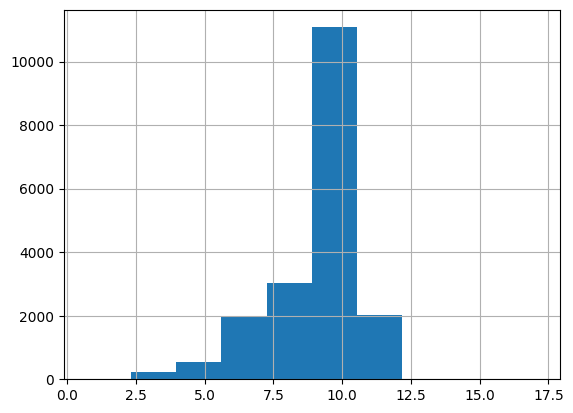

In [56]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Creating histogram as the target variable is continuous.
# This will help us understand the distribution of the Price values.
print("Price Before:\n" , car_price['Price'])
car_price['Price'] = np.log(car_price['Price'] + 1)

car_price["Price"].hist()
print("Price After:\n" , car_price['Price'])

**Observations from Step 4**


*   List item
*   List item

**Step 5: Basic Exploraty Data Analysis**


*   This step is performed to gauge the overall data.
    - The volume of data and the types of columns present in the data.
*   Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.
*   This step helps with starting the column/data rejection process.
*   There are 4 commands which are used for basic data exploratory in analysis in Python.
*   head(): helps to see a few sample rows of the data.
*   info(): provides the summarised information of the data.
*   describe(): provides the descriptive statistical details of the data.
nunique(): helps us to identify if a column is categorical or continuous.

In [57]:
# Looking at sample rows in the data
car_price.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,9.497697,1399.0,32.0,1242.0,2010,4.0,1.0,2.0,3.5,186005.0,6.0,0.0,0.0,1.0,0.0,12.0,12
1,44731507,9.718482,1018.0,8.0,658.0,2011,4.0,0.0,5.0,3.0,192000.0,6.0,2.0,0.0,1.0,0.0,1.0,8
2,45774419,9.044050,NaN,21.0,684.0,2006,3.0,0.0,5.0,1.3,200000.0,4.0,3.0,1.0,1.0,1.0,1.0,2
3,45769185,8.190909,862.0,16.0,661.0,2011,4.0,1.0,2.0,2.5,168966.0,4.0,0.0,0.0,1.0,0.0,14.0,0
4,45809263,9.369649,446.0,21.0,684.0,2014,3.0,1.0,5.0,1.3,91901.0,4.0,0.0,1.0,1.0,0.0,12.0,4


In [58]:
# Looking at sample rows in the data
car_price.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,9.044050,NaN,36.0,385.0,1999,1.0,1.0,0.0,2.0,300000.0,4.0,1.0,2.0,0.0,0.0,12.0,5
19233,45778856,9.660269,831.0,23.0,1334.0,2011,9.0,1.0,5.0,2.4,161600.0,4.0,2.0,1.0,1.0,0.0,11.0,8
19234,45804997,10.170035,836.0,23.0,1442.0,2010,4.0,1.0,1.0,2.0,116365.0,4.0,0.0,1.0,1.0,0.0,7.0,4
19235,45793526,8.581482,1288.0,8.0,456.0,2007,4.0,1.0,1.0,2.0,51258.0,4.0,0.0,1.0,1.0,0.0,1.0,4
19236,45813273,6.154858,753.0,23.0,1334.0,2012,9.0,1.0,2.0,2.4,186923.0,4.0,0.0,1.0,1.0,0.0,14.0,12


In [59]:
# Observing the summarised information of data.
# Data types, missing values based on the number of non-null values vs total rows, etc.
# Remove the variables from data which have too many missing values (missing values > 30%)
# Remove qualitative variables which cannot be used in Machine Learning
car_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  float64
 2   Levy              13215 non-null  float64
 3   Manufacturer      18924 non-null  float64
 4   Model             18924 non-null  float64
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  float64
 7   Leather interior  18924 non-null  float64
 8   Fuel type         18924 non-null  float64
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  float64
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  float64
 13  Drive wheels      18924 non-null  float64
 14  Doors             18924 non-null  float64
 15  Wheel             18924 non-null  float64
 16  Color             18924 non-null  float64
 17

In [60]:
# Looking at the descriptive statistics of the data.
car_price.describe(include="all")

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,1.892400e+04,18924.000000,13215.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,9.028981,906.299205,33.087349,862.224530,2010.914236,6.266804,0.725587,3.426971,2.306251,1.555373e+06,4.580216,0.537571,0.909691,0.965969,0.076781,7.772194,6.568379
std,9.375468e+05,1.585140,463.296871,17.787356,410.990871,5.665749,2.791944,0.446230,1.806295,0.877591,4.880221e+07,1.200223,0.897196,0.566586,0.214430,0.266250,5.361955,4.322323
min,2.074688e+07,0.693147,87.000000,0.000000,0.000000,1939.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.569501e+07,8.581482,640.000000,21.000000,537.000000,2009.000000,4.000000,0.000000,2.000000,1.800000,7.019575e+04,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,4.000000
50%,4.577191e+07,9.485925,781.000000,32.000000,834.000000,2012.000000,7.000000,1.000000,5.000000,2.000000,1.264000e+05,4.000000,0.000000,1.000000,1.000000,0.000000,7.000000,6.000000
75%,4.580174e+07,10.001703,1058.000000,54.000000,1226.000000,2015.000000,9.000000,1.000000,5.000000,2.500000,1.891198e+05,4.000000,1.000000,1.000000,1.000000,0.000000,12.000000,12.000000
max,4.581665e+07,17.085365,11714.000000,64.000000,1589.000000,2020.000000,10.000000,1.000000,6.000000,20.000000,2.147484e+09,16.000000,3.000000,2.000000,2.000000,1.000000,15.000000,16.000000


In [61]:
# Finding unique values for each column.
# To understand which column is categorical and which one is continuous -
# typically if the number of unique values are < 20, then the variable is likely
# to be categorical
car_price.nunique()

ID                  18924
Price                2315
Levy                  558
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume          65
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

**Observations from Step 5 - Basic Exploratory Data Analysis**


Based on the basic exploration above, I can identify that:

* ID - Continuous. Selected.
* Price - Continuous. Selected. This is the target variable which is to be predicted by the proposed regression model.
* Levy - Continuous. Selected.
* Manufacturer - Continuous. Selected.
* Model - Continuous. Selected.
* Prod. year - Continuous. Selected.
* Category - Categorical. Selected.
* Leather interior - Categorical. Selected.
* Fuel type - Categorical. Selected.
* Engine volume - Continuous. Selected.
* Mileage - Continuous. Selected.
* Cylinders - Categorical. Selected.
* Gear box type - Categorical. Selected.
* Drive wheels - Categorical. Selected.
* Doors - Categorical. Selected.
* Wheel - Categorical. Selected.
* Color - Categorical. Selected.
* Airbags - Categorical. Selected.

**Step 6: Removing Unwanted Columns**

There are no qualitative columns in the data, hence, I will not be removing any column.

**Step 7: Visual Exploratory Data Analysis**


*   Visualise distribution of all the Categorical Predictor variables in the data using bar plots.
*   We can spot a categorical variable in the data by looking at the unique values in them.
*   Typically a categorical variable contains less than 20 unique values AND there are repetition of values, which means the data can be grouped by those unique values.
*   Based on the Basic Exploration Data Analysis in the previous step, we can see 10 Categorical Predictors in the data.
  - Category
  - Leather interior
  - Fuel type
  - Cylinders
  - Gear box type
  - Drive wheels
  - Doors
  - Wheel
  - Color
  - Airbags
*   We will use bar charts to see how the data is distributed for these categorical columns.





In [62]:
# Plotting multiple bar charts at once for categorical variables.
# Since there is no default function which can plot bar charts for multiple
# columns at once
# We are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
  %matplotlib inline

  import matplotlib.pyplot as plt

  # Generating multiple subplots
  fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(35,5))
  fig.suptitle("Bar Charts for: "+str(colsToPlot))

  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind="bar", ax=subPlot[plotNumber])

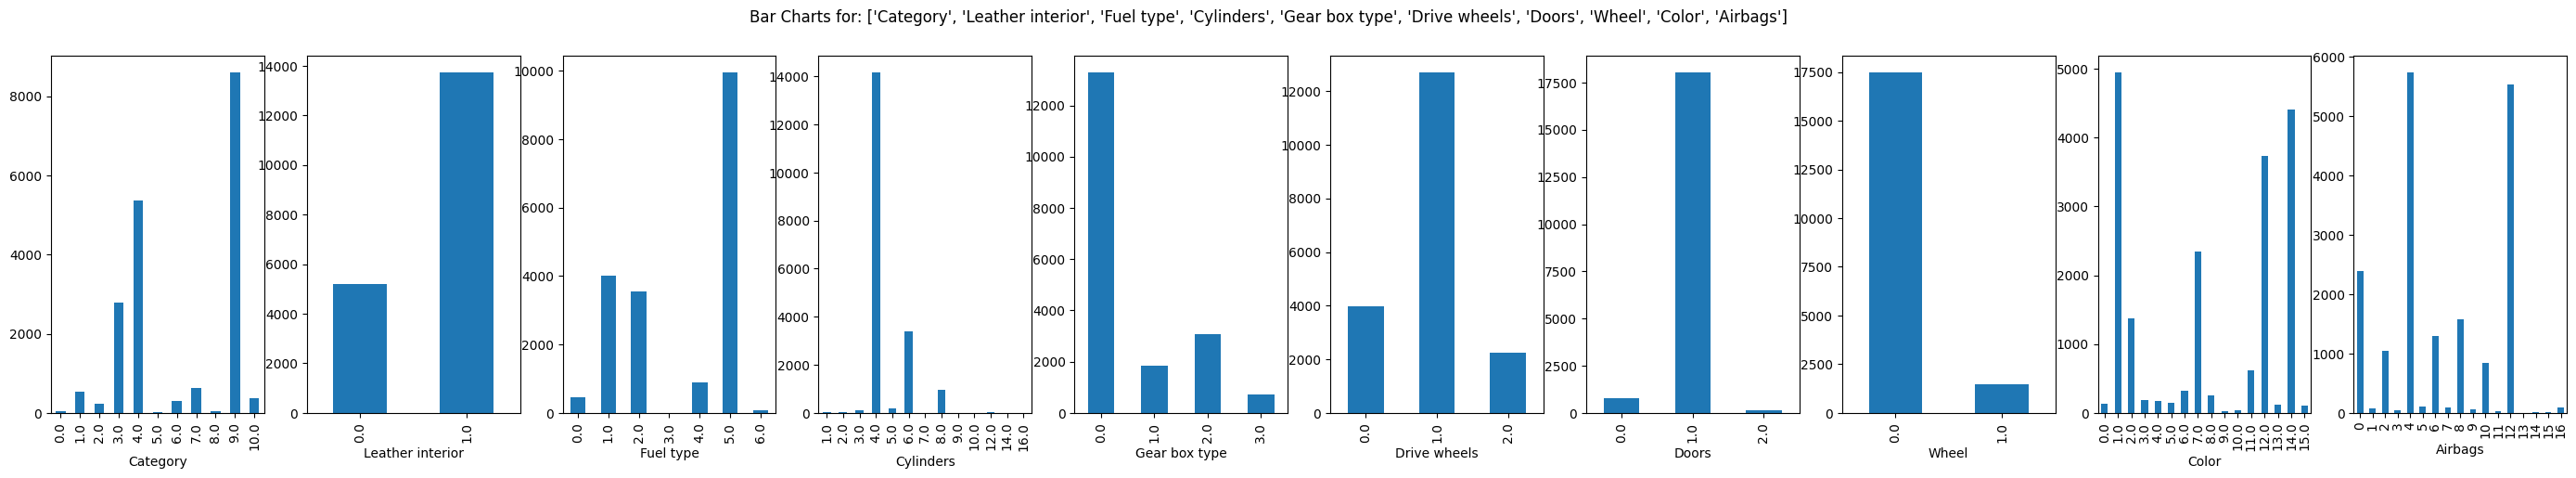

In [63]:
# Calling the function PlotBarCharts() we have created

PlotBarCharts(inpData=car_price,
              colsToPlot=["Category", "Leather interior", "Fuel type", "Cylinders", "Gear box type",
                          "Drive wheels", "Doors", "Wheel", "Color", "Airbags"])

**Observations from Step 7 - Visual Exploratory Data Analysis**


*  Bar Charts have allowed for interpretations on the 10 data columns.
*  The bar charts represent the frequencies of each category on the Y-axis and the category names on the X-axis.
*  In the ideal bar chart, each category has comparable frequency. *Hence, there are enough rows for each category in the data for the ML/AI regression algortihm to learn.
*  If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers:
   - These columns may not be very helpful in machine learning model development.
*   We can confirm this with the correlation analysis step coming up, and take a final call to select or reject the column/data attribute.
*  In this dataset, it is worth noting that "Leather interior", "Cylinders", "Gear box type", "Drive wheels", "Doors" and "Wheel" are skewed as there is only one bar that dominates the others.
  - Such columns may not be correlated with the Target Variable as there is not enough information to learn.
* However, the selected Categorical Variables will be slected for further analysis.



**Step 8: Now Visualise Distribution of all Continuous Predictor Variables in the Data using Histograms**


* Based on the Basic Exploratory Data Analysis, there are 8 Continuous Predictor variables.
  - ID
  - Price
  - Levy
  - Manufacturer
  - Model
  - Prod. Year
  - Engine Volume
  - Mileage



array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Levy'}>],
       [<Axes: title={'center': 'Manufacturer'}>,
        <Axes: title={'center': 'Model'}>,
        <Axes: title={'center': 'Prod. year'}>],
       [<Axes: title={'center': 'Engine volume'}>,
        <Axes: title={'center': 'Mileage'}>, <Axes: >]], dtype=object)

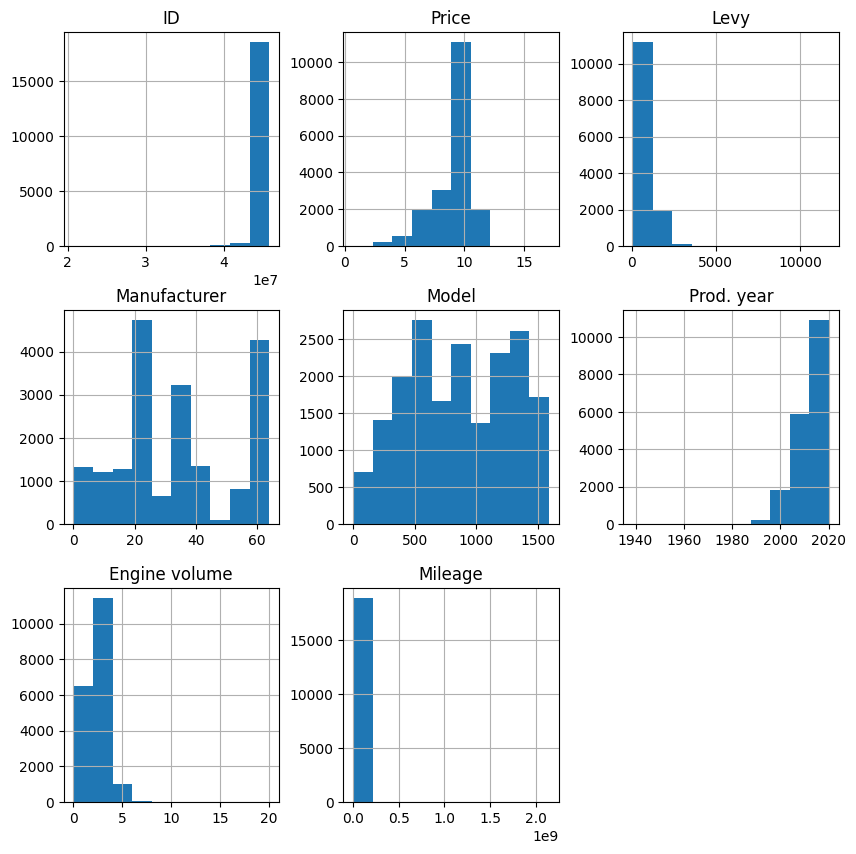

In [64]:
# Plotting histograms of multiple columns together
car_price.hist(["ID", "Price", "Levy", "Manufacturer", "Model", "Prod. year",
                "Engine volume", "Mileage"], figsize=(10,10))

**Observations from Step 8:**


* Each of the histograms above show the data disribution for a single Continuous Variable.
* The X-axis shows the range of values and Y-axis represents the number of values in that range.
  - For example, the "Prod. year" histogram has around 11,000 rows of data between years 1940-2020.
* The ideal outcome for a histogram is a bell curve or slightly skewed bell curve.
* If there is too much skewness, then outlier removal treatment should be done and the column should be re-examined. If that doesn't solve the problem then reject the column/data attribute.
* Selected Continuous Variables:
  - ID
  - Price
  - Levy
  - Manufacturer
  - Model
  - Prod. year
  - Engine volume
  - Mileage


**Step 9: Outlier Analysis**


*  Outliers are extreme values in the data which are far away from most of the values.
*  They can be seen as the tails in the histogram.
*  Outlier must be treated one column/data attribute at a time.
*  As the treatment will be slightly different for each column, why should the outliers be analysed?
  - Outliers bias the building of machine learning models.
  - As the algorithm tries to fit the extreme value, it goes away from the majority of the data.
*  Outlined below are two options to treat outliers in the data.
  - Option 1: Delete the outlier Records. Only if there are a few rows that are lost.
  - Option 2: Impute the outlier values with a logical business value.
*  Let's find out the most logical value to replace the outliers by looking at the histogram.

In [65]:
# Replacing outliers for "Levy"
# Finding nearest values to 5000 mark
car_price["Levy"][car_price["Levy"]<5000].sort_values(ascending=False)

19048    4860.0
17495    4741.0
9222     4736.0
1571     4508.0
8887     4283.0
          ...  
7022       87.0
12917      87.0
2010       87.0
4814       87.0
7685       87.0
Name: Levy, Length: 13200, dtype: float64

Observation: Above result shows the nearest logical value is 4860, hence, replacing any value above 5000 with it.

In [66]:
# Replacing outliers with nearest possible value
car_price["Levy"][car_price["Levy"]>5000] =4860

**Step 10: Visualising Data Distribution after Outlier Removal**

array([[<Axes: title={'center': 'Levy'}>]], dtype=object)

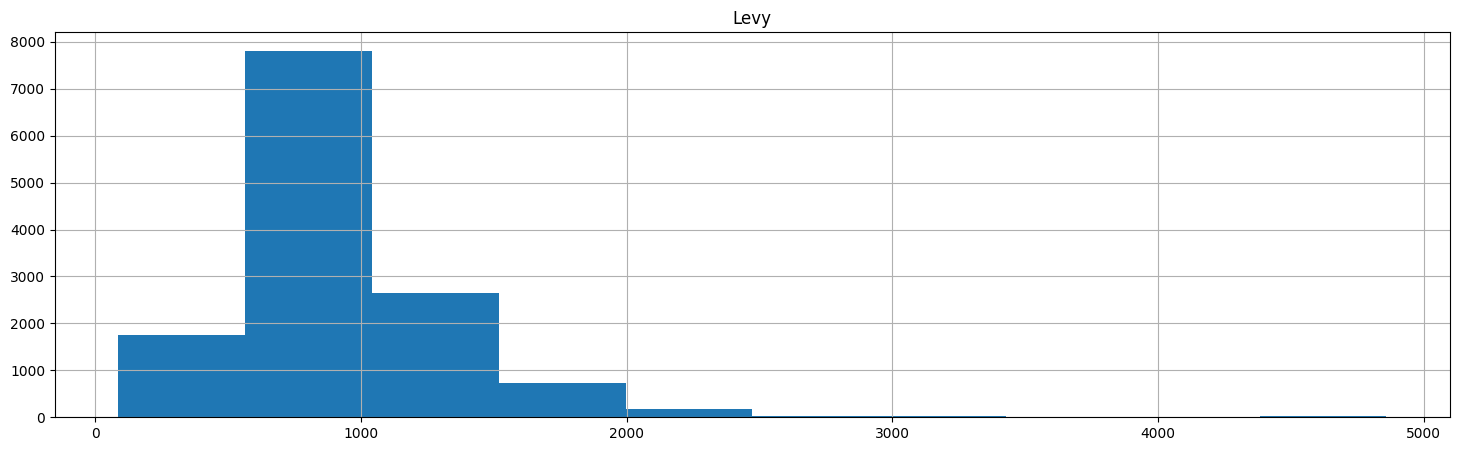

In [67]:
car_price.hist(["Levy"], figsize=(18,5))

**Observation from Step 10:**


* The distribution has improved after outlier treatment.
* It is now slightly more balanced.

**Step 11: Missing Values Analysis**


* Missing values are treated for each column separately.
* If a column has more than 30% data missing, then missing value treatment cannot be done.
* That column must be rejected because too much information is missing.
* Below are some options for treating missing values in data:
- Delete the missing value rows if there are only a few records.
- Impute the missing values with MEDIAN value for continuous variables.
- Impute the missing values with MODE value for categorical variables.
- Interpolate the values based on nearby values.
- Interpolates the values based on business logic.

In [68]:
# Finding how many missing values there are for each column
car_price.isnull().sum()

ID                     0
Price                  0
Levy                5709
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

**Observations from Step 11: Missing Value Analysis**


* "Levy" has data missing, therefore it needs to be removed.

**Step 12: Feature Selection (Attribute Selection)**


* Now, we choose the best columns (features) which are correlated to the target variable.
* This can be done directly by measuring the correlation values or ANOVa analysis or chi-square tests.
* However, it is always helpful to visualise the relation between the target/class variable and each of the predictors (features) to get a better sense of data.
* Listed below are some of the techniques used for visualising relationship between two variables as well as measuring the strength statistically.
* Visual exploration of relationship between variables.
- Continuous vs Continuous -- Scatter Plot
- Categorical vs Continuous -- Box Plot
- Categorical vs Categorical -- Grouped Bar Plots
- Statistical measurement of relationship strength between variables.
- Continuous vs Continuous -- Correlation Matrix
- Categorical vs Continuous -- ANOVA Test
- Categorical vs Categorical -- Chi-square Test
* For this dataset, the target variable is continuous, hence, the following two scenarios will be used.
- Continuous Target Variable vs Continuous Predictor
- Continuous Target Variable vs Categorical Predictor



**Relationship Exploration: Continuous vs Continuous - Scatter Plots**


* When the Target variable is continuous and the predictor is also continuous, we can visualise the relationship between the two variables using scatter plot and measure the strength of relation using a metric called Pearson's Correlation Value.

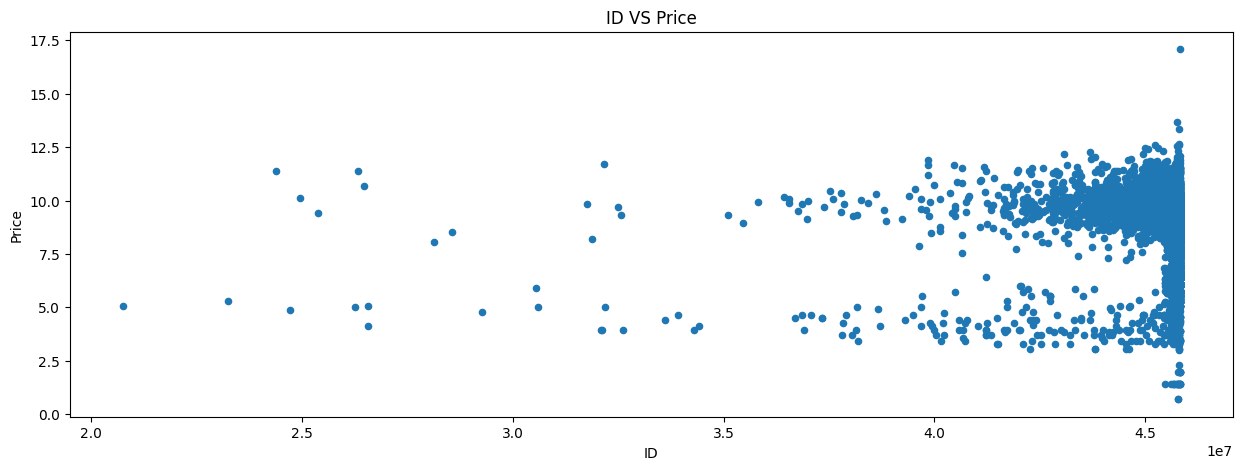

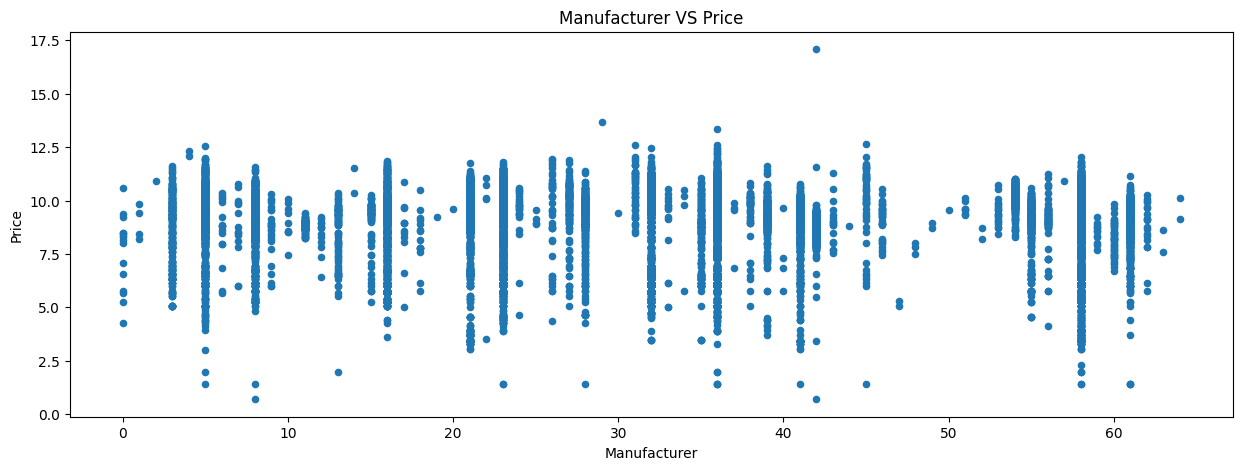

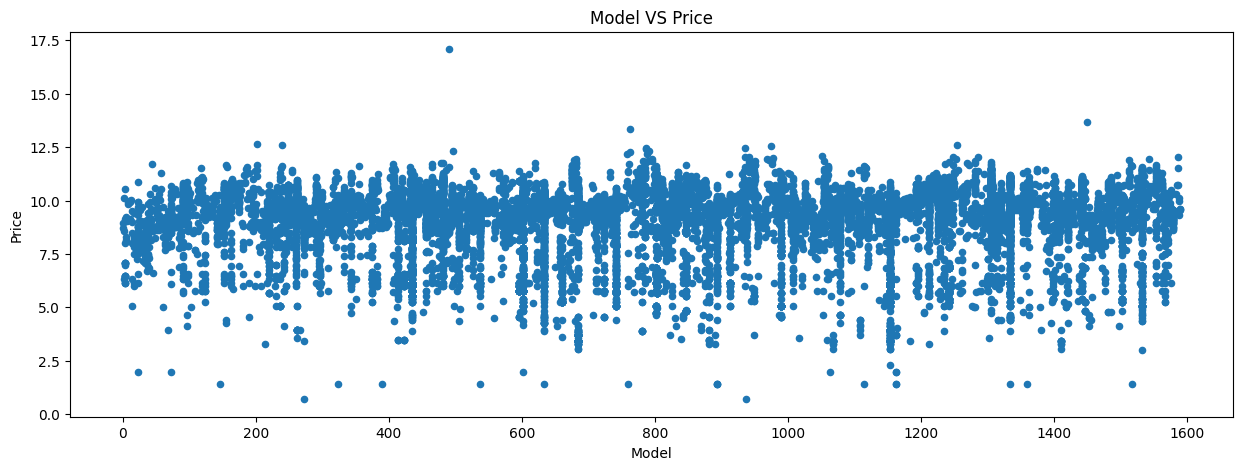

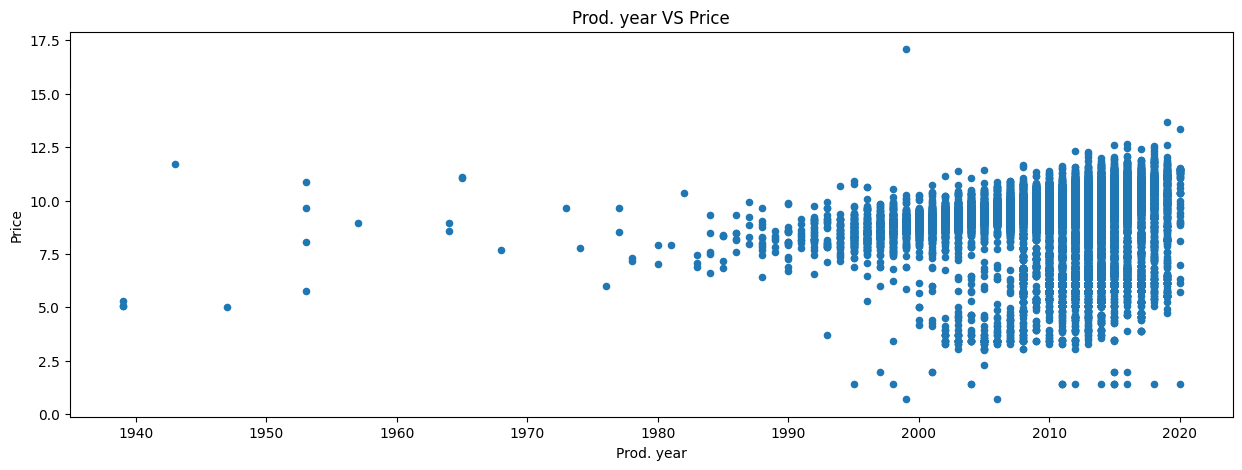

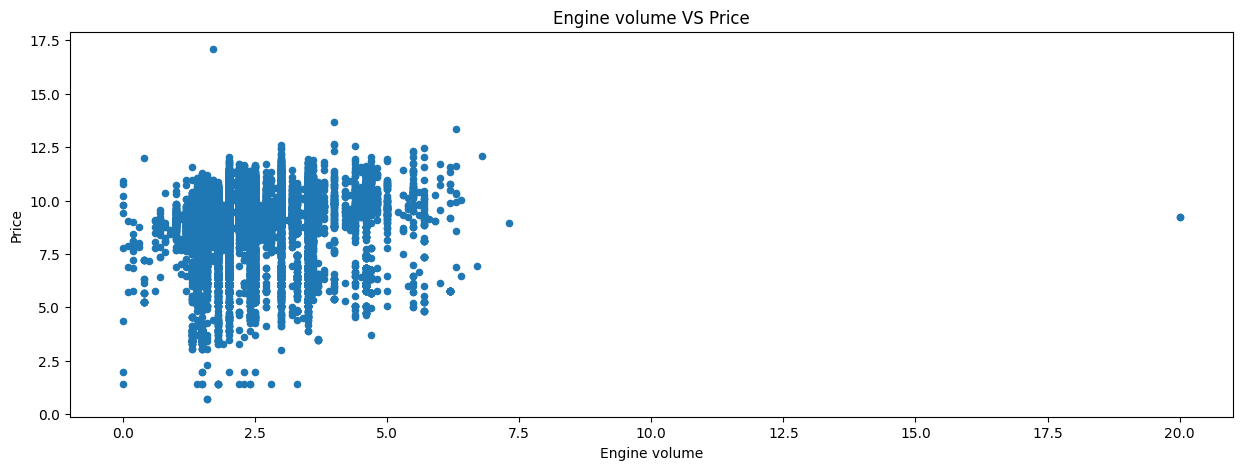

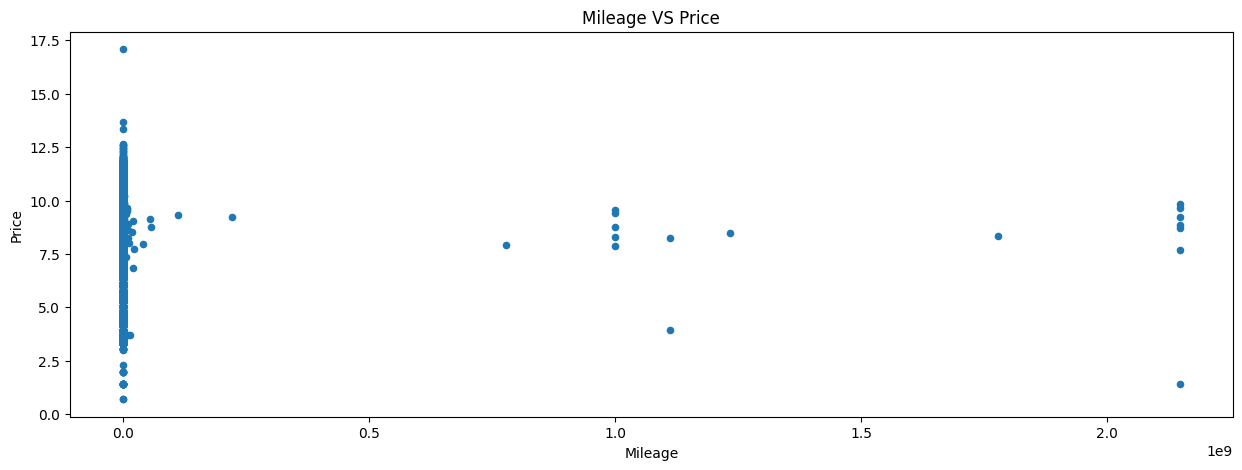

In [51]:
ContinuousCols=["ID", "Manufacturer", "Model", "Prod. year",
                "Engine volume", "Mileage"]

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
  car_price.plot.scatter(x=predictor, y="Price", figsize=(15,5), title=predictor+" VS "+"Price")

**Scatter Plots Interpretation**


* We can see from the Manufacturer and Model scatter plot graphs that they have an increasing trend where when one value increases, so does the other.
* The Engine volume scatter plot graphs are skewed mostly to the left indicating that the lower the Levy and Engine volume, the higher the price will be.
* The more recent the Prod. year of a car, the more expensive the car will be as it is newer.
* Lastly, the lower the mileage, the more expensive the car.

**Step 13: Statistical Feature Selection (Continuous vs Continuous) using Correlation Value**


* Pearson's Correlation Co-efficient is a powerful metric for doing this.
* It can simply be calculated as the co-variance between two features x and y (numerator) divided by the product of their standard deviations (denominator).
* This value can be calculated only between two numeric columns.
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend.
* Correlation between (0,1] means directly proportional, the scatter plot will show an upward trend.
* Correlation near {0} means no relationship, the scatter plot will show no clear trend.
* If the correlation value between two variables is > 0.5 in magnitude, it indicates a good relationship and the sign does not matter.
* We observe the correlation between the target variable and all other predictor variable(s) to check which columns/features/predictors are actually related to the target variable in question.

In [69]:
# Calculating correlation matrix
ContinuousCols=["ID", "Price", "Manufacturer", "Model", "Prod. year",
                  "Engine volume", "Mileage"]

# Creating the correlation matrix
CorrelationData=car_price[ContinuousCols].corr()
CorrelationData

,ID,Price,Manufacturer,Model,Prod. year,Engine volume,Mileage
ID,1.000000,0.058353,-0.034396,-0.003355,0.072030,-0.013155,0.004225
Price,0.058353,1.000000,-0.073322,0.054874,0.139292,-0.021627,-0.019186
Manufacturer,-0.034396,-0.073322,1.000000,-0.017196,-0.051567,-0.041471,0.012553
Model,-0.003355,0.054874,-0.017196,1.000000,0.064736,0.027045,-0.008184
Prod. year,0.072030,0.139292,-0.051567,0.064736,1.000000,-0.032427,-0.064058
Engine volume,-0.013155,-0.021627,-0.041471,0.027045,-0.032427,1.000000,-0.006292
Mileage,0.004225,-0.019186,0.012553,-0.008184,-0.064058,-0.006292,1.000000


In [70]:
# Filtering only those columns where absolute correlation > 0.1 with
# target variable
# Reduce the 0.1 threshold if no variable is selected
CorrelationData["Price"][abs(CorrelationData["Price"]) > 0.1]

Price         1.000000
Prod. year    0.139292
Name: Price, dtype: float64

**Observations from Step 13:**


*   Final selected Continuous column: "Prod. year"

**Step 14: Relationship Exploration: Categorical vs Continuous - Box Plots**


* When the target variable is continuous and the predictor variable is categorical, we analyse the relation using Box Plots.
* We measure the strength of the relation using the ANOVA Test.

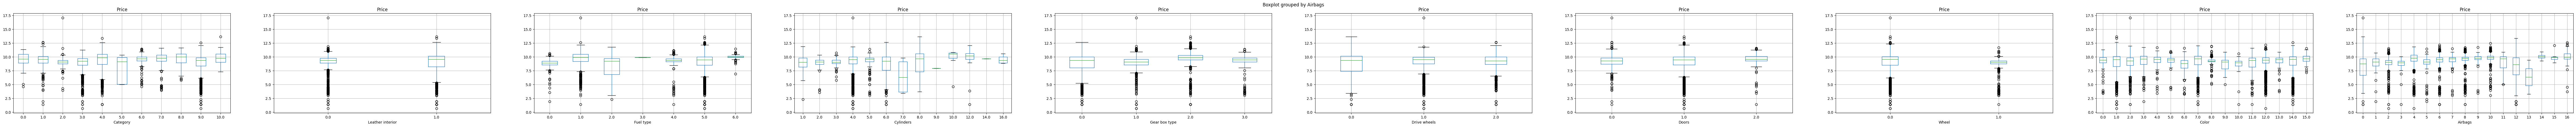

In [71]:
# Box Plots for Continuous Target Variable "Price" and Categorical Predictors
CategoricalColsList=["Category", "Leather interior", "Fuel type", "Cylinders",
                     "Gear box type", "Drive wheels", "Doors", "Wheel", "Color", "Airbags"]

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList),
                             figsize=(120,5))

# Creating box plots for each continuous predictor against the Target Variable
# "Price"
for PredictorCol, i in zip(CategoricalColsList, range(len(CategoricalColsList))):
  car_price.boxplot(column="Price", by=PredictorCol, figsize=(5,5), vert=True,
                    ax=PlotCanvas[i])

**Observations from Step 14: Box Plots Interpretation**


* These plots give an idea about data distribution of the Continuous Predictor on the Y-axis for each of the Categorical Predictors on the X-axis.
* If the distribution looks similar for each category, that means the Continuous variable has NO effect on the Target variable. Therefore, the variables are NOT correlated.
* If the distribution is different for each category, then these variables might be correlated to Price.
* For this data, all the Categorical predictors look like they correlate with the Target variable.

We can confirm this by looking at the results of the ANOVA test below.

**Step 15: Statistical Feature Selection (Categorical vs Continuous) using ANOVA Test**


* Analysis of Variance (ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable.
* Assumption (H0) Null Hypothesis: There is no relation between the given variables. E.g.
- The average (mean) values of the numeric Target Variable is the same for all the groups in the Categorical Predictor Variable)
- ANOVA Test Result: Probability of H0 (Null Hypothesis being True)

In [72]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [73]:
# Calling the function to check which Categorical variables are correlated with
# Target
CategoricalList=["Category", "Leather interior", "Fuel type","Cylinders", "Gear box type",
                 "Drive wheels", "Doors", "Wheel", "Color", "Airbags"]

FunctionAnova(inpData=car_price,
              TargetVariable='Price',
              CategoricalPredictorList=CategoricalList)

##### ANOVA Results ##### 

Category is correlated with Price | P-Value: 1.568619676476271e-111
Leather interior is correlated with Price | P-Value: 0.0020743181243794173
Fuel type is correlated with Price | P-Value: 9.088848648088443e-259
Cylinders is correlated with Price | P-Value: 2.5635685565620376e-28
Gear box type is correlated with Price | P-Value: 4.150818363223648e-211
Drive wheels is correlated with Price | P-Value: 1.4043384460144667e-22
Doors is correlated with Price | P-Value: 0.0012120748385459942
Wheel is correlated with Price | P-Value: 3.5754350060801356e-31
Color is correlated with Price | P-Value: 6.409893629388122e-12
Airbags is correlated with Price | P-Value: 0.0


['Category',
 'Leather interior',
 'Fuel type',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags']

**Observations from Step 15:**


* The results from our ANOVA test confirm our visual analysis using the box plots above, however, all categorical variables EXCEPT Leather interior are correlated with our target variable.
* Final selected Categorical columns:
  - Category
  - Fuel type
  - Cylinders
  - Gear box type
  - Drive wheels
  - Doors
  - Wheel
  - Color
  - Airbags

**Selecting Final Predictors/Features for building Machine Learning/AI Model**


* Based on the extensive tests with Exploratory Data Analysis, the final features/predictors/columns for Machine Learning Model building can be selected as:
  - Prod. year
  - Category
  - Fuel type
  - Cylinders
  - Gear box type
  - Drive wheels
  - Doors
  - Wheel
  - Color
  - Airbags

In [74]:
SelectedColumns=["Prod. year", "Category", "Fuel type", "Cylinders", "Gear box type",
                 "Drive wheels", "Doors", "Wheel", "Color", "Airbags", "Price"]

# Selecting final columns
DataforML=car_price[SelectedColumns]
DataforML.head()

,Prod. year,Category,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,2010,4.0,2.0,6.0,0.0,0.0,1.0,0.0,12.0,12,9.497697
1,2011,4.0,5.0,6.0,2.0,0.0,1.0,0.0,1.0,8,9.718482
2,2006,3.0,5.0,4.0,3.0,1.0,1.0,1.0,1.0,2,9.044050
3,2011,4.0,2.0,4.0,0.0,0.0,1.0,0.0,14.0,0,8.190909
4,2014,3.0,5.0,4.0,0.0,1.0,1.0,0.0,12.0,4,9.369649


In [75]:
# Saving this final data subset for reference during deployment
DataforML.to_pickle("DataforML.pkl")

**Step 15: Data Pre-Processing for Machine Learning Model Building or Model Development**


* List of steps that need to be performed on predictor variables before data can be used for Machine Learning.
* Converting each Ordinal Categorical column to numeric.
* Converting Binary Nomical Categorical columns to numeric using pd.get_dummies().
* Data Transformation (Optional): Standardisation/Normalisation/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks.
* Converting the Ordinal variable to numeric - in this data there is no Ordinal Categorical variable.
* Converting the Binary Nominal variable to numeric using 1/0 mapping: there is no binary nominal variable in string format in this data.

In [76]:
# Treating all the nominal variables at once using dummy variables
DataforML_Numeric=pd.get_dummies(DataforML)

# Adding Target Variable to the data
DataforML_Numeric["Price"]=car_price["Price"]

# Printing sample rows
DataforML_Numeric.head()

,Prod. year,Category,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,2010,4.0,2.0,6.0,0.0,0.0,1.0,0.0,12.0,12,9.497697
1,2011,4.0,5.0,6.0,2.0,0.0,1.0,0.0,1.0,8,9.718482
2,2006,3.0,5.0,4.0,3.0,1.0,1.0,1.0,1.0,2,9.044050
3,2011,4.0,2.0,4.0,0.0,0.0,1.0,0.0,14.0,0,8.190909
4,2014,3.0,5.0,4.0,0.0,1.0,1.0,0.0,12.0,4,9.369649


**Step 16: Machine Learning Model Development**


* Splitting the data into a Training and Testing sample.
* The full data for creating the model (training data) won't be used.
* Some data is randomly selected and kept aside for checking how good the model is.
- This is known as Testing Data and the remaining data is called Training Data on which the model is built.
* Typically, 70% of data is used as Training Data and the remaining 30% is used as Testing Data.

In [77]:
# Printing all the column names for our reference
DataforML_Numeric.columns

Index(['Prod. year', 'Category', 'Fuel type', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags', 'Price'],
      dtype='object')

In [78]:
# Separate Target and Predictor Variables
TargetVariable="Price"
Predictors=["Prod. year", "Category", "Fuel type", "Cylinders", "Gear box type",
                 "Drive wheels", "Doors", "Wheel", "Color", "Airbags"]

x=DataforML_Numeric[Predictors].values
y=DataforML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=428)

**Step 17: Standardisation/Normalisation of Data**


* If the resultant accuracy of this transformation wants to be compared with the accuracy of raw data, this step can be chosen to not run (optional step).
* However, if using KNN or Neural Networks, this step becomes necessary.



In [79]:
# Standardisation of Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardisation or normalisation
# On this data, min, max, and normalisation produce better results.

# Choose between standardisation and MinMax normalisation
# PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=42)

In [80]:
# Sanity check for sample data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13246, 10)
(13246,)
(5678, 10)
(5678,)


**Step 18: Multiple Linear Regression Algorithm for ML/AI Model Building**

In [81]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear Regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(x_train, y_train)
prediction=LREG.predict(x_test)

from sklearn import metrics
# Measuring goodness of fit in Training Data
print("R2 Value: ", metrics.r2_score(y_train, LREG.predict(x_train)))

#############################################################################

print("\n##### Model Validation and Accuracy Calculations #####")

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[("Predicted"+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults["ERR"]=100 * ((abs(
    TestingDataResults["Price"]-TestingDataResults
    ["PredictedPrice"]))/TestingDataResults["Price"])

MAPE=np.mean(TestingDataResults["ERR"])
MedianMAPE=np.median(TestingDataResults["ERR"])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print("Mean Accuracy on Test Data: ", Accuracy)
# Can be negative sometimes due to outlier
print("Median Accuracy on Test Data: ", MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeroes in the Target Variable if you are using MAPE
def Accuracy_Score(orig, pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  print("#"*70, "Accuracy: ", 100-MAPE)
  return(100-MAPE)

# Custom scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validtion function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross Validation on a given algorithm
# Passing full data x and y because the K-fold will split the data and
# automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print("\nFinal Average Accuracy of the Model: ", round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value:  0.12175834092153748

##### Model Validation and Accuracy Calculations #####
   Prod. year  Category  Fuel type  Cylinders  Gear box type  Drive wheels  \
0      2013.0       9.0        5.0        4.0            0.0           1.0   
1      2013.0       9.0        5.0        4.0            0.0           1.0   
2      2015.0       9.0        5.0        4.0            0.0           1.0   
3      2001.0       3.0        5.0        4.0            0.0           1.0   
4      1998.0       6.0        1.0        6.0            1.0           2.0   

   Doors  Wheel  Color  Airbags     Price  PredictedPrice  
0    1.0    0.0   14.0      4.0  9.359191             9.0  
1    1.0    0.0   12.0     12.0  6.154858             8.0  
2    1.0    0.0    1.0      4.0  9.911605             9.0  
3    1.0    1.0    0.0      8.0  8.926385             7.0  
4    1.0    0.0    2.0      2.0  9.842569             9.0  
Mean Accuracy on Test Data:  84.2041541086751
Median Accuracy on 

Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.3790751516645221

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Category  Fuel type  Cylinders  Gear box type  Drive wheels  \
0      2013.0       9.0        5.0        4.0            0.0           1.0   
1      2013.0       9.0        5.0        4.0            0.0           1.0   
2      2015.0       9.0        5.0        4.0            0.0           1.0   
3      2001.0       3.0        5.0        4.0            0.0           1.0   
4      1998.0       6.0        1.0        6.0            1.0           2.0   

   Doors  Wheel  Color  Airbags     Price  PredictedPrice  
0    1.0    0.0   14.0      4.0  9.359191            10.0  
1    1.0    0.0   12.0     12.0  6.154858             8.0  
2    1.0    0.0    1.0      4.0  9.911605            10.0  
3    1.0    1.0    0.0      8.0  8.926385             7.0  
4    1.0    0.0    2.0      2.0  9.842569             9.0  
Mean Accuracy on Tes

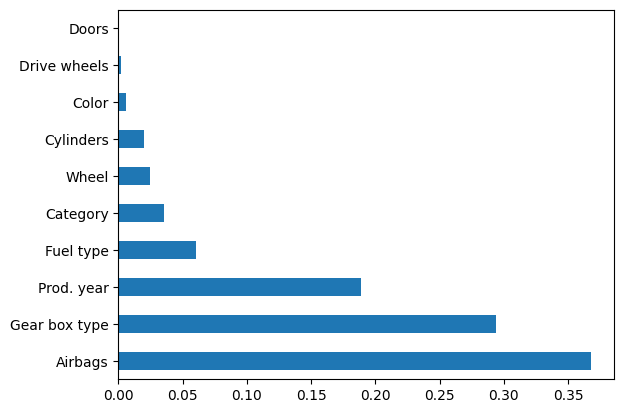

In [82]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(x_train, y_train)
prediction=DT.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults["ERR"]=100 * ((abs(
  TestingDataResults["Price"]-TestingDataResults['PredictedPrice']))/TestingDataResults["Price"])

MAPE=np.mean(TestingDataResults['ERR'])
MedianMAPE=np.median(TestingDataResults['ERR'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on Test Data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on Test Data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Plotting/Visualising the Decision Tree

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Airbags <= 11.5\nfriedman_mse = 2.515\nsamples = 13246\nvalue = 9.032"] ;
1 [label="Airbags <= 3.5\nfriedman_mse = 1.953\nsamples = 9286\nvalue = 9.304"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Gear box type <= 0.5\nfriedman_mse = 2.847\nsamples = 2456\nvalue = 8.471"] ;
1 -> 2 ;
3 [label="Fuel type <= 3.0\nfriedman_mse = 3.408\nsamples = 1523\nvalue = 8.168"] ;
2 -> 3 ;
4 [label="Fuel type <= 1.5\nfriedman_mse = 3.204\nsamples = 651\nvalue = 7.627"] ;
3 -> 4 ;
5 [label="friedman_mse = 2.122\nsamples = 160\nvalue = 8.593"] ;
4 -> 5 ;
6 [label="friedman_mse = 3.153\nsamples = 491\nvalue = 7.312"] ;
4 -> 6 ;
7 [label="Color <= 12.5\nfriedman_mse = 3.178\nsamples = 872\nvalue = 8.572"] ;
3 -> 7 ;
8 [label="friedman_mse = 2.872\nsamples = 696\nvalue = 8.719"] ;
7 -> 8 ;
9 [label="friedman_mse = 3.97\nsamples = 176\nvalue = 7.994"] ;
7 -> 9 ;
10 [label="Prod. yea

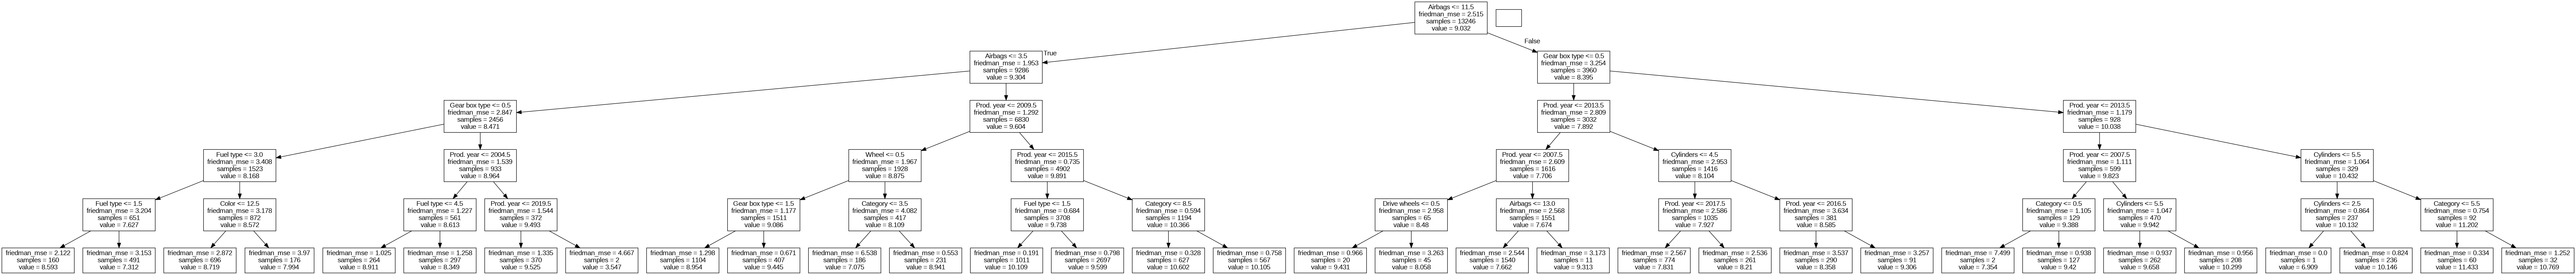

In [83]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors,
                                class_names=TargetVariable)

# Printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000, height=1500)

# Double click on the graph to zoom in

Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.3521633554506919

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Category  Fuel type  Cylinders  Gear box type  Drive wheels  \
0      2013.0       9.0        5.0        4.0            0.0           1.0   
1      2013.0       9.0        5.0        4.0            0.0           1.0   
2      2015.0       9.0        5.0        4.0            0.0           1.0   
3      2001.0       3.0        5.0        4.0            0.0           1.0   
4      1998.0       6.0        1.0        6.0            1.0           2.0   

   Doors  Wheel  Color  Airbags     Price  PredictedPrice  
0    1.0    0.0   14.0      4.0  9.359191            10.0  
1    1.0    0.0   12.0     12.0  6.154858             8.0  
2    1.0    0.0    1.0      4.0  9.911605            10.0  
3    1.0    1.0    0.0      8.0  8.926385             8.0  
4    1.0    0.0    2.0      2.0  9.842569             9.0  
Me

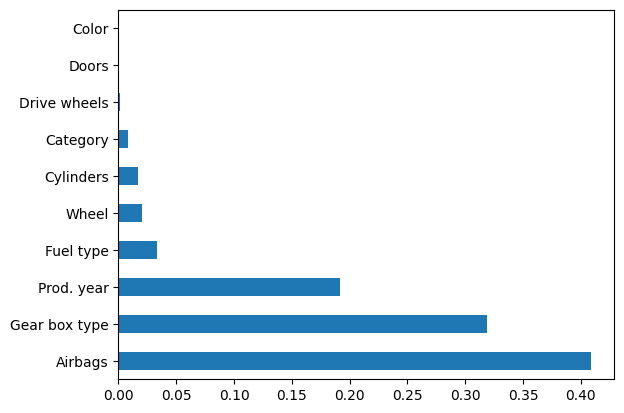

In [84]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(x_train,y_train)
prediction=RF.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['ERR']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['ERR'])
MedianMAPE=np.median(TestingDataResults['ERR'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on Test Data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on Test Data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Plotting One of the Decision Tree in Random Forest Regressor

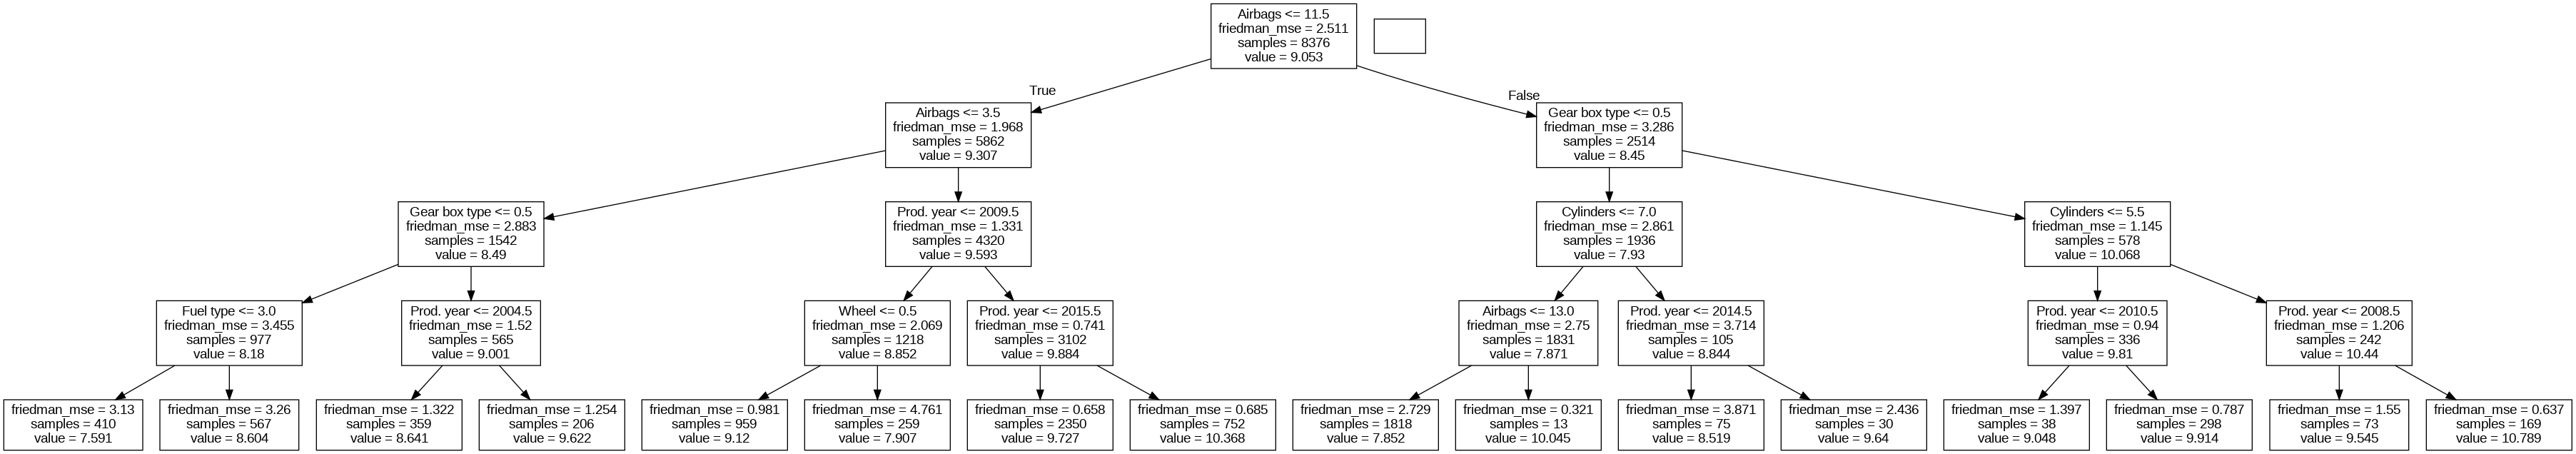

In [85]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5], out_file=None, feature_names=Predictors,
                                class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000, height=2000)

**Step 19: AdaBoost Algorithm for ML/AI Model Building**

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value:  0.21398519878265643

##### Model Validation and Accuracy Calculations #####
   Prod. year  Category  Fuel type  Cylinders  Gear box type  Drive wheels  \
0      2013.0       9.0        5.0        4.0            0.0           1.0   
1      2013.0       9.0        5.0        4.0            0.0           1.0   
2      2015.0       9.0        5.0        4.0            0.0           1.0   
3      2001.0       3.0        5.0        4.0            0.0           1.0   
4      1998.0       6.0        1.0        6.0            1.0           2.0   

   Doors  Wheel  Color  Airbags     Price  PredictedPrice  
0    1.0    0.0   14.0      4.0  9.359191             9.0  
1    1.0    0.0   12.0     12.0  6.154858             8.0  
2    1.0    0.0    1.0      4.0  9.911605             9.0  
3    1.0    1.0    0.0      8.0  8.926385             8.0  
4    1.0    0.0    

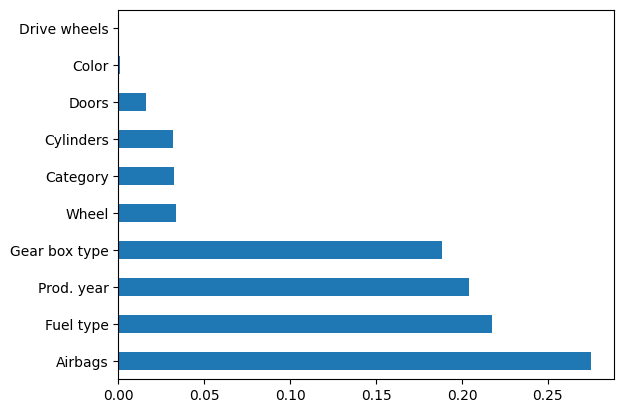

In [86]:
# Adaboost (Boosting of Multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR = DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR,
                            learning_rate=0.04)
# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(x_train, y_train)
prediction=AB.predict(x_test)

from sklearn import metrics
# Measuring goodness of fit in Training Data
print("R2 Value: ", metrics.r2_score(y_train, AB.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind="barh")

################################################################################
print("\n##### Model Validation and Accuracy Calculations #####")

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[("Predicted"+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults["ERR"]=100 * ((abs(TestingDataResults["Price"]-TestingDataResults["PredictedPrice"]))/TestingDataResults["Price"])

MAPE=np.mean(TestingDataResults["ERR"])
MedianMAPE=np.median(TestingDataResults["ERR"])

Accuracy = 100-MAPE
MedianAccuracy = 100-MedianMAPE
print("Mean Accuracy on Test Data: ", Accuracy)
# Can be negative sometimes due to outlier
print("Median Accuracy on Test Data: ", MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeroes in Target Variable if using MAPE
def Accuracy_Score(orig, pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  print("#"*70, "Accuracy: ", 100-MAPE)
  return(100-MAPE)

# Custom scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validtion function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross Validation on a given algorithm
# Passing full data x and y because the K-fold will split the data and
# automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print("\nFinal Average Accuracy of the Model: ", round(Accuracy_Values.mean(),2))

XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value:  0.42652269503769846

##### Model Validation and Accuracy Calculations #####
   Prod. year  Category  Fuel type  Cylinders  Gear box type  Drive wheels  \
0      2013.0       9.0        5.0        4.0            0.0           1.0   
1    

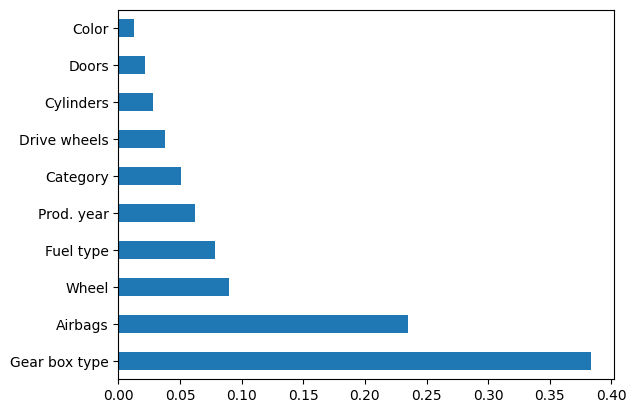

In [87]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=1000,
                      objective="reg:linear", booster="gbtree")

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(x_train, y_train)
prediction=XGB.predict(x_test)

from sklearn import metrics
# Measuring goodness of fit in Training Data
print("R2 Value: ", metrics.r2_score(y_train, XGB.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind="barh")

##############################################################################
print("\n##### Model Validation and Accuracy Calculations #####")

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[("Predicted"+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults["ERR"]=100 * ((abs(TestingDataResults["Price"]-TestingDataResults["PredictedPrice"]))/TestingDataResults["Price"])

MAPE=np.mean(TestingDataResults["ERR"])
MedianMAPE=np.median(TestingDataResults["ERR"])

Accuracy = 100-MAPE
MedianAccuracy = 100-MedianMAPE
print("Mean Accuracy on Test Data: ", Accuracy)
# Can be negative sometimes due to outlier
print("Median Accuracy on Test Data: ", MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeroes in Target Variable if using MAPE
def Accuracy_Score(orig, pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  print("#"*70, "Accuracy: ", 100-MAPE)
  return(100-MAPE)

# Custom scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validtion function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross Validation on a given algorithm
# Passing full data x and y because the K-fold will split the data and
# automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x, y, cv=10, scoring=custom_Scoring)
print("\nAccuracy Values for 10-Fold Cross Validation:\n", Accuracy_Values)
print("\nFinal Average Accuracy of the Model: ", round(Accuracy_Values.mean(),2))

Plotting a Single Decision Tree out of XGBoost

<Axes: >

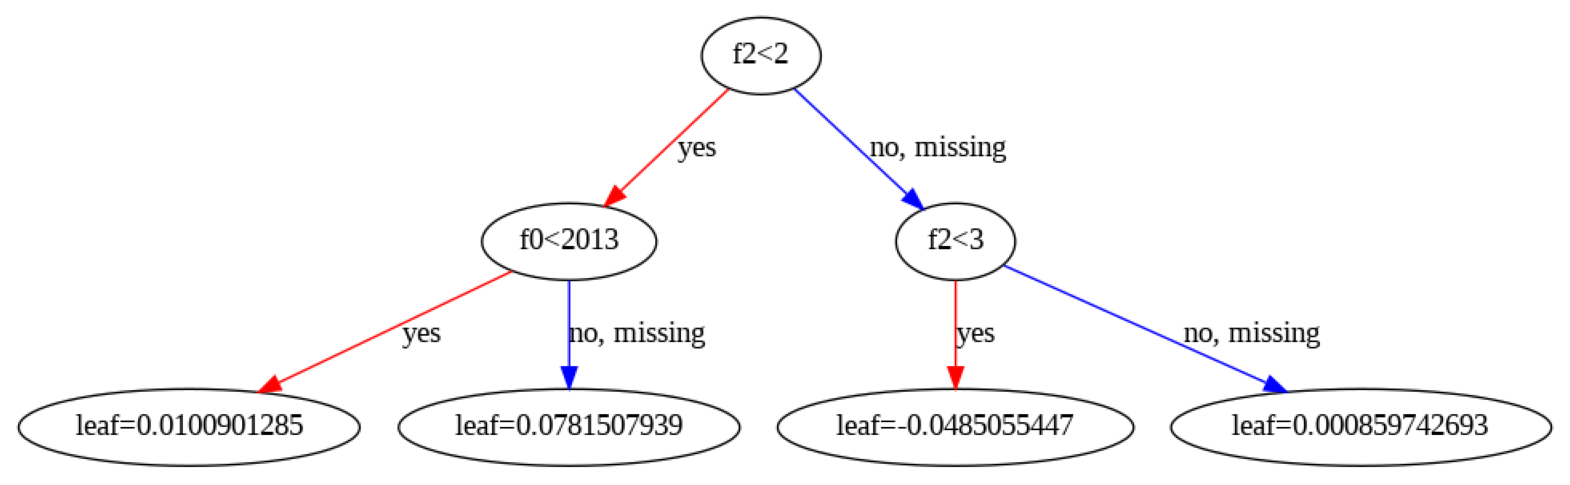

In [88]:
# Plotting a Single Decision Tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,8))
plot_tree(XGB, num_trees=10, ax=ax)

K-Nearest Neighbour (KNN)

In [89]:
# K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(x_train, y_train)
prediction=KNN.predict(x_test)

from sklearn import metrics
# Measuring goodness of fit in Training Data
print("R2 Value: ", metrics.r2_score(y_train, KNN.predict(x_train)))

#Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

########################################################################
print("\n##### Model Validation and Accuracy Calculations #####")

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[("Predicted"+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults["ERR"]=100 * ((abs(TestingDataResults["Price"]-TestingDataResults["PredictedPrice"]))/TestingDataResults["Price"])

MAPE=np.mean(TestingDataResults["ERR"])
MedianMAPE=np.median(TestingDataResults["ERR"])

Accuracy = 100-MAPE
MedianAccuracy = 100-MedianMAPE
print("Mean Accuracy on Test Data: ", Accuracy)
# Can be negative sometimes due to outlier
print("Median Accuracy on Test Data: ", MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeroes in Target Variable if using MAPE
def Accuracy_Score(orig, pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  print("#"*70, "Accuracy: ", 100-MAPE)
  return(100-MAPE)

# Custom scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validtion function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross Validation on a given algorithm
# Passing full data x and y because the K-fold will split the data and
# automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x, y, cv=10, scoring=custom_Scoring)
print("\nAccuracy Values for 10-Fold Cross Validation:\n", Accuracy_Values)
print("\nFinal Average Accuracy of the Model: ", round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value:  0.6103834591579823

##### Model Validation and Accuracy Calculations #####
   Prod. year  Category  Fuel type  Cylinders  Gear box type  Drive wheels  \
0      2013.0       9.0        5.0        4.0            0.0           1.0   
1      2013.0       9.0        5.0        4.0            0.0           1.0   
2      2015.0       9.0        5.0        4.0            0.0           1.0   
3      2001.0       3.0        5.0        4.0            0.0           1.0   
4      1998.0       6.0        1.0        6.0            1.0           2.0   

   Doors  Wheel  Color  Airbags     Price  PredictedPrice  
0    1.0    0.0   14.0      4.0  9.359191            10.0  
1    1.0    0.0   12.0     12.0  6.154858             8.0  
2    1.0    0.0    1.0      4.0  9.911605            10.0  
3    1.0    1.0    0.0      8.0  8.926385             9.0  
4    1.0    0.0    2.0      2.0  9.842569             9.0  
Mean Accuracy on Test Data:  88.60944178588957
Med

Support Vector Machine (SVM) Regressor

In [90]:
# Support Vector Machines (SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel="rbf", gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(x_train, y_train)
prediction=SVM.predict(x_test)

from sklearn import metrics
# Measuring goodness of fit in Training Data
print("R2 Value: ", metrics.r2_score(y_train, SVM.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns
# The built-in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
# feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
# feature_importances.nlargest(10).plot(kind="barh")

################################################################################

print("\n##### Model Validation and Accuracy Calculations #####")

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[("Predicted"+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults["ERR"]=100 * ((abs(TestingDataResults["Price"]-TestingDataResults["PredictedPrice"]))/TestingDataResults["Price"])

MAPE=np.mean(TestingDataResults["ERR"])
MedianMAPE=np.median(TestingDataResults["ERR"])

Accuracy = 100-MAPE
MedianAccuracy = 100-MedianMAPE
print("Mean Accuracy on Test Data: ", Accuracy)
# Can be negative sometimes due to outlier
print("Median Accuracy on Test Data: ", MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeroes in Target Variable if using MAPE
def Accuracy_Score(orig, pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  print("#"*70, "Accuracy: ", 100-MAPE)
  return(100-MAPE)

# Custom scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validtion function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross Validation on a given algorithm
# Passing full data x and y because the K-fold will split the data and
# automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x, y, cv=10, scoring=custom_Scoring)
print("\nAccuracy Values for 10-Fold Cross Validation:\n", Accuracy_Values)
print("\nFinal Average Accuracy of the Model: ", round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value:  0.42157786124318897

##### Model Validation and Accuracy Calculations #####
   Prod. year  Category  Fuel type  Cylinders  Gear box type  Drive wheels  \
0      2013.0       9.0        5.0        4.0            0.0           1.0   
1      2013.0       9.0        5.0        4.0            0.0           1.0   
2      2015.0       9.0        5.0        4.0            0.0           1.0   
3      2001.0       3.0        5.0        4.0            0.0           1.0   
4      1998.0       6.0        1.0        6.0            1.0           2.0   

   Doors  Wheel  Color  Airbags     Price  PredictedPrice  
0    1.0    0.0   14.0      4.0  9.359191            10.0  
1    1.0    0.0   12.0     12.0  6.154858             8.0  
2    1.0    0.0    1.0      4.0  9.911605            10.0  
3    1.0    1.0    0.0      8.0  8.926385             9.0  
4    1.0    0.0    2.0      2.0  9.842569             9.0  
Mean Accuracy on Test Data:  88.29308401338776
Median Accuracy

**Step 20: Model Deployment**


* Deployment of the Model - based on the above trials, we select the algorithm which produces the best average accuracy.
* In this case, multiple algorithms have produced similar average accuracy. Hence, any one of them can be chosen.
* NOTE
* In order to deploy the model, we follow steps outlined next.
* Train/build the model again using 100% data available.
* Save the model as a serialised file which can be stored anywhere.
* Create a python function which gets integrated with front-end viewer (GUI/Website, etc.) to take all the inputs and returns the prediction.
* Choosing only the most important variables.
* It's beneficial to keep lesser number of predictors for the model while deploying it in production.
* The lesser predictors you keep, the better it is as the model will be less dependent on predictor columns/features, hence, more stable.
* This is important specially when the data is high dimensional (too many predictor columns/features).
* For this dataset, the most important predictor variables are ........ As these are consistently on top of the variable importance chart for every algorithm. Hence, choosing these as a final set of predictor variables will result in better house price prediction platform/system.

In [91]:
# Separate Target Variable and Predictor Variables
TargetVariable="Price"

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=["Prod. year"]

x=DataforML_Numeric[Predictors].values
y=DataforML_Numeric[TargetVariable].values

# Standardisation of Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose either standardisation or normalisation
# On this data, min, max, normalisation produced better results

# Choose between standardisation and MinMax normalisation
# PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)

# Generating the standardised values of x
x=PredictorScalerFit.transform(x)

print(x.shape)
print(y.shape)

(18924, 1)
(18924,)


Cross Validating the Final Model Accuracy with Less Predictors

In [92]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=1000,
                      objective="reg:linear", booster="gbtree")

# Running 10-Fold Cross Validation on a given algorithm
# Passing full data x and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x, y, cv=10, scoring=custom_Scoring)
print("\nFinal Average Accuracy of the Model: ", round(Accuracy_Values.mean(),2))

###################################################################### Accuracy:  83.51763318290449
###################################################################### Accuracy:  84.44046094431769
###################################################################### Accuracy:  84.0804829457546
###################################################################### Accuracy:  83.23998421922838
###################################################################### Accuracy:  83.27829564112604
###################################################################### Accuracy:  84.45522837137783
###################################################################### Accuracy:  83.66116073998208
###################################################################### Accuracy:  82.9558273285209
###################################################################### Accuracy:  83.07299471662819
###################################################################### Accuracy:  84.680488821616

Fin

**Step 21: Retraining the Final Model using 100% Data**

In [93]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(x,y)

Step 24: Save the Model as a Serialised File which can be stored anywhere

In [94]:
import pickle
import os

# Saving the Python objects as serialised files can be done using pickle library
# Save final model

with open("Final_XGB_Model.pkl", "wb") as fileWriteStream:
  pickle.dump(Final_XGB_Model, fileWriteStream)
  # Don't forget to close file stream
  fileWriteStream.close()

print("Pickle file of Predictive Model is saved at Location:", os.getcwd())

Pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/ST1


**Step 22: Create a Python function**

In [95]:
from re import IGNORECASE
# This function can be called from any front end tool/website

def FunctionPredictResult(InputData):
  import pandas as pd
  Num_Inputs=InputData.shape[0]

  # Making sure the input data has the same columns as it was used for training the model.
  # Also, if standardisation/normalisation was done, then the same must be done for new input.

  # Appending the new data with Training Data
  DataforML=pd.read_pickle("DataforML.pkl")
  # InputData=InputData.append(DataforML, ignore_index=True)
  InputData = pd.concat([InputData, DataforML], ignore_index=True)

  # Generating dummy variables for the rest of the nominal variables
  InputData=pd.get_dummies(InputData)

  # Maintaining the same order of columns as it was during the model training
  Predictors=["Prod. year"]

  # Generating the input values to the model
  x=InputData[Predictors].values[0:Num_Inputs]

  # Generating the standardised values of x since it was also done while model training
  x=PredictorScalerFit.transform(x)

  # Loading the function from Pickle file
  import pickle
  with open("Final_XGB_Model.pkl", "rb") as fileReadStream:
    PredictionModel=pickle.load(fileReadStream)
    # Don't forget to close the filestream!
    fileReadStream.close()

  # Generating predictions
  Prediction=PredictionModel.predict(x)
  PredictionResult=pd.DataFrame(Prediction, columns=["Prediction"])
  return(PredictionResult)

**Step 23: Caliing the Function for some New Data**

In [96]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[2010], [2020]], columns=["Prod. year"])

print(NewSampleData)

# Calling the function for prediction
FunctionPredictResult(InputData=NewSampleData)

   Prod. year
0        2010
1        2020


,Prediction
0,8.957432
1,10.118734


**Conclusion**


* The function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.

Therefore, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the house price tasks in the platform/system.

**Deploying Model with few Parameters**

**Function for Predictions API**

In [97]:
# Creating the function which can take inputs and return predictions
def FunctionGeneratePrediction(inp_Prodyear):

  # Creating a data fram for the model input
  SampleInputData=pd.DataFrame(data=[[inp_Prodyear]], columns=["Prod. year"])

  # Calling the function defined above using the input parameters
  Predictions=FunctionPredictResult(InputData=SampleInputData)

  # Returning the predictions
  return(Predictions.to_json())

# Call function
FunctionGeneratePrediction(inp_Prodyear = 2010)

'{"Prediction":{"0":8.9574317932}}'